Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.1  
Zadnji put ažurirano: 16. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić, Mladen Karan 

Objavljeno: **16. listopada 2017.**  
Rok za predaju: **23. listopada 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [15]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['uniform', 'f', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [16]:
X1 = np.array([[0],[1],[2],[4]])
y1 = np.array([4,1,2,5])

#### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
def PolynomialTransformation(X, degree):
    features = PolynomialFeatures(degree)
    return features.fit_transform(X)

print X1
degree = 1 # if degree > 1, construct n-degree polynomial
XPoly1 = PolynomialTransformation(X1, degree)
print XPoly1

[[0]
 [1]
 [2]
 [4]]
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]]


#### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [19]:
from numpy import linalg

In [20]:
def ManualLinReg(X, y):
    XT = X.transpose()
    XTmulX = np.dot(XT, X)
    XTmulXinv = np.linalg.inv(XTmulX)
    w = np.dot(np.dot(XTmulXinv, XT), y)
    return w

w = ManualLinReg(XPoly1, y1)
print w

w = np.dot(np.linalg.pinv(XPoly1), y1)
print w

#w = w.transpose()
#print w #the transpose has happened but it doesn't effect the repr

[ 2.2         0.45714286]
[ 2.2         0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

#### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
predictions = np.dot(XPoly1, w)
print y1
print predictions

print mean_squared_error(y1, predictions)
print mean_squared_error(y1, predictions) * len(X)/2

[4 1 2 5]
[ 2.2         2.65714286  3.11428571  4.02857143]
2.04285714286
4.08571428571


#### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [63]:
#print np.linalg.inv(X) #cannot do that. The matrix isn't a square matrix.
degree = 3
XPoly3 = PolynomialTransformation(X1, degree)
print XPoly3
XPoly3inv = np.linalg.inv(XPoly3)
print np.dot(XPoly3inv, y1)

[[  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]]
[ 4.         -5.91666667  3.375      -0.45833333]


#### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [24]:
from sklearn.linear_model import LinearRegression

In [64]:
def PerformModel(model, X, y):
    model.fit(X, y)
    w0 = model.intercept_
    wi = model.coef_
    predictions = model.predict(X)
    trainError = mean_squared_error(predictions, y)
    return w0, wi, predictions, trainError
    
model = LinearRegression()
w0, wi, predictions, trainError = PerformModel(model, XPoly1, y1)
print w0
print wi
print predictions
print trainError

2.2
[ 0.          0.45714286]
[ 2.2         2.65714286  3.11428571  4.02857143]
2.04285714286


### 2. Polinomijalna regresija i utjecaj šuma

#### (a)

Razmotrimo sada regresiju na većem broju primjera. Koristite funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma koristi se funkcija [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [26]:
from numpy.random import normal
from random import uniform

In [65]:
# N "tall"
# n "wide"
# noise is standard deviation, sigma

def MakeLabels(X, f, noise=0) :
    if noise > 0:
        return np.array([(f(x) + np.random.normal(0, noise)) for x in X])
    return  np.array([f(x) for x in X])

def Function(x):
    return 5 + x - 2*x*x - 5*x*x*x

XUniform2 = np.array([uniform(-5,5) for number in xrange(50)])
XUniform2.sort()
XUniform2 = XUniform2.reshape(-1, 1)
f = Function
y2 = MakeLabels(XUniform2, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

In [66]:
import scipy as sp

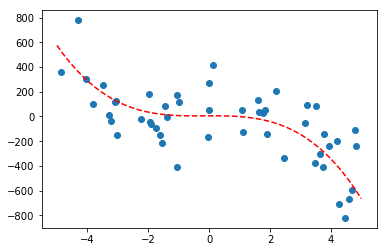

In [67]:
def DrawFunctionOnInterval(f, interval):
    XDraw = sp.linspace(interval[0], interval[1])
    yDraw = MakeLabels(XDraw, f, 0)
    plt.plot(XDraw, yDraw, "r--")
    
def DrawUniformExamples(X, y):
    plt.scatter(X, y)

DrawUniformExamples(XUniform2, y2)
DrawFunctionOnInterval(f, (-5,5))

#### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [68]:
def DrawResults(X, y, color):
    plt.plot(X, y, color)

39346.3980593


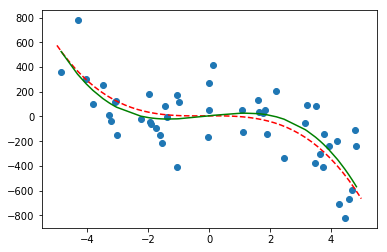

In [70]:
degree = 3 # if degree > 1, construct n-degree polynomial
           # example: d=3 -> (1, x, x*x, x*x*x)
features = PolynomialFeatures(degree)

model = LinearRegression()
XPoly3 = features.fit_transform(XUniform2)
w0, wi, predictions, trainError = PerformModel(model, XPoly3, y2)

print trainError
DrawUniformExamples(XUniform2, y2)
DrawFunctionOnInterval(f, (-5,5))
DrawResults(XUniform2, predictions, "g")

### 3. Odabir modela

#### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Degree:1 trainError:52125.0089384
Degree:3 trainError:39346.3980593
Degree:5 trainError:36796.5827546
Degree:10 trainError:25744.0504697
Degree:20 trainError:19456.5836349


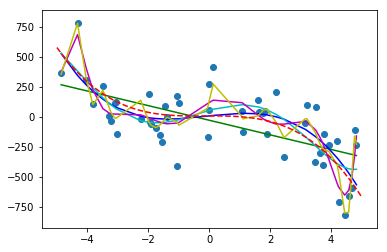

In [71]:
model = LinearRegression()

degrees = [1,   3,   5,   10,  20]
colors = ["g", "b", "c", "m", "y"]
for index in xrange(len(degrees)):
    degree = degrees[index]
    features = PolynomialFeatures(degree)
    
    XPoly = features.fit_transform(XUniform2)
    w0, wi, predictions, trainError = PerformModel(model, XPoly, y2)
    
    print "Degree:"+str(degree),
    print "trainError:"+str(trainError)
    color = colors[index]
    plt.plot(XUniform2, predictions, color)
    
DrawUniformExamples(XUniform2, y2)
DrawFunctionOnInterval(f, (-5,5))

#### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

[Decrication source](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split)

In [72]:
#from sklearn import cross_validation #Depricated!
from sklearn.model_selection import train_test_split

Degree:1 testError:48661.6293513
Degree:2 testError:46868.6064074
Degree:3 testError:36960.5418486
Degree:4 testError:41215.1558184
Degree:5 testError:103110.84596
Degree:6 testError:113388.022203
Degree:7 testError:74488.5694005
Degree:8 testError:316540.417616
Degree:9 testError:190695.416486
Degree:10 testError:271651.928783
Degree:11 testError:2326964.81135
Degree:12 testError:4456707.95772
Degree:13 testError:9315678.22148
Degree:14 testError:12200592.397
Degree:15 testError:8000753.43773
Degree:16 testError:13061226.5767
Degree:17 testError:213624180.41
Degree:18 testError:8155327.89067
Degree:19 testError:634164962.133
Degree:20 testError:62310994.4583


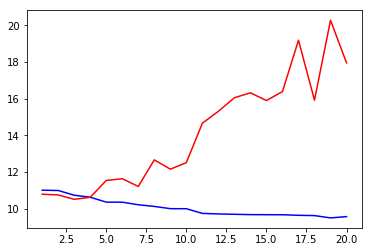

In [73]:
def PerformModelAndCrossValidation(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    
    model.fit(X_train, y_train)

    predictions = model.predict(X_train)
    trainError = mean_squared_error(y_train, predictions)

    predictions = model.predict(X_test)
    testError = mean_squared_error(y_test, predictions)
    
    return trainError, testError
        
def DrawErrors(xAxis, trainErrors, testErrors, ax=False):
    if ax:
        ax.plot(xAxis, log(trainErrors), "b")
        ax.plot(xAxis, log(testErrors), "r")
    else:
        plt.plot(xAxis, log(trainErrors), "b")
        plt.plot(xAxis, log(testErrors), "r")

model = LinearRegression()
trainErrors = []
testErrors = []
degrees = xrange(1, 21)
for degree in degrees:
    features = PolynomialFeatures(degree)
    
    XPoly = features.fit_transform(XUniform2)
    trainError, testError = PerformModelAndCrossValidation(model, XPoly, y2)
    trainErrors.append(trainError)
    testErrors.append(testError)
    
    print "Degree:"+str(degree),
    print "testError:"+str(testError)

DrawErrors(range(1, 21), trainErrors, testErrors)

#### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

Degree:1 testError:25866.7564594
Degree:2 testError:30063.9778388
Degree:3 testError:10969.646895
Degree:4 testError:11558.9454201
Degree:5 testError:11535.4697663
Degree:6 testError:11352.240677
Degree:7 testError:13517.7594708
Degree:8 testError:17345.1332161
Degree:9 testError:15542.412778
Degree:10 testError:18194.7794711
Degree:11 testError:24222.9875077
Degree:12 testError:16441.774981
Degree:13 testError:20617.1358882
Degree:14 testError:137234.583732
Degree:15 testError:378611.092261
Degree:16 testError:969539.294615
Degree:17 testError:2510698.69426
Degree:18 testError:1630619.23052
Degree:19 testError:16024650.4313
Degree:20 testError:173105236.505
Degree:1 testError:57667.5613228
Degree:2 testError:56858.5643381
Degree:3 testError:44260.0548836
Degree:4 testError:46913.9458411
Degree:5 testError:46778.3534918
Degree:6 testError:44424.3509395
Degree:7 testError:46066.1431359
Degree:8 testError:48105.4195132
Degree:9 testError:49147.3361324
Degree:10 testError:53058.1343765
De

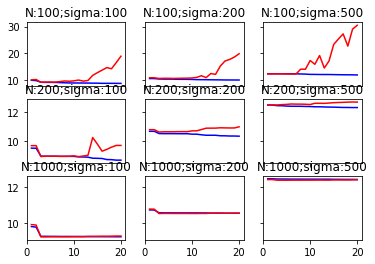

In [74]:
Ns = [100,200,1000]
sigmas = [100,200,500]
f, axarr = plt.subplots(3, 3, sharex='col', sharey='row')
counter = 0
for N in Ns:
    for sigma in sigmas:
        X3 = np.array([uniform(-5,5) for number in xrange(N)])
        X3.sort()
        X3 = X3.reshape(-1, 1)
        f = Function
        y3 = MakeLabels(X3, f, sigma)
        
        model = LinearRegression()
        trainErrors = []
        testErrors = []
        degrees = xrange(1, 21)
        for degree in degrees:
            features = PolynomialFeatures(degree)

            XPoly = features.fit_transform(X3)
            trainError, testError = PerformModelAndCrossValidation(model, XPoly, y3)
            trainErrors.append(trainError)
            testErrors.append(testError)

            print "Degree:"+str(degree),
            print "testError:"+str(testError)
        
        DrawErrors(range(1,21), trainErrors, testErrors, ax=axarr[counter/3,counter%3])
        axarr[counter/3,counter%3].set_title("N:"+str(N)+";sigma:"+str(sigma))
        counter += 1

### 4. Regularizirana regresija

#### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [75]:
degree = 3
features = PolynomialFeatures(degree)
XPoly3 = features.fit_transform(X1)
print XPoly3

XT = XPoly3.transpose()
XTmulX = np.dot(XT, XPoly3)

I = np.eye(len(XPoly3))

lams = [0,1,10]
for lam in lams:
    XTmulXinv = np.linalg.inv(XTmulX + np.dot(lam, I))
    w = np.dot(np.dot(XTmulXinv, XT), y1)
    print "Lam:"+str(lam),
    print w

[[  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]]
Lam:0 [ 4.         -5.91666667  3.375      -0.45833333]
Lam:1 [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
Lam:10 [ 0.43312265  0.11060671  0.13827839  0.03093411]


#### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

[Ridge Loss Function](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

[Lecture Ridge Loss Function](http://www.fer.unizg.hr/_download/repository/SU-2016-4-Regresija2.pdf)

In [76]:
from sklearn.linear_model import Ridge

In [77]:
lams = [0,1,10]
for lam in lams:
    model = Ridge(alpha=lam)
    w0, wi, predictions, trainError = PerformModel(model, XPoly3, y1)
    print w0
    print wi
#??? Why is there a difference?.

4.0
[ 0.         -5.91666667  3.375      -0.45833333]
3.05696145125
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
2.49444184312
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

#### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [78]:
import matplotlib.patches as mpatches

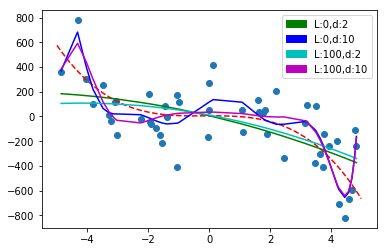

In [80]:
DrawUniformExamples(XUniform2, y2)
DrawFunctionOnInterval(f, (-5,5))

lams = [0,100]
degrees = [2,10]
colors = ["g", "b", "c", "m"]
patches = []
counter = 0
for lam in lams:
    for degree in degrees:
        model = Ridge(alpha=lam)
        features = PolynomialFeatures(degree)
    
        XPoly = features.fit_transform(XUniform2)
        w0, wi, predictions, trainError = PerformModel(model, XPoly, y2)
        
        color = colors[counter]
        counter += 1
        
        patches.append(mpatches.Patch(color=color, label="L:"+str(lam)+",d:"+str(degree)))
        plt.plot(XUniform2, predictions, color)
        
plt.legend(handles=patches)

#### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


Lam:0 testError:85010698128.1
Lam:1 testError:1363983.42364
Lam:2 testError:807087.492742
Lam:3 testError:570370.000172
Lam:4 testError:459823.67891
Lam:5 testError:408845.014072
Lam:6 testError:374653.221539
Lam:7 testError:359587.002842
Lam:8 testError:350982.433667
Lam:9 testError:345990.372749
Lam:10 testError:341159.881213
Lam:11 testError:339328.822748
Lam:12 testError:338603.386135
Lam:13 testError:337048.197864
Lam:14 testError:335517.68566
Lam:15 testError:336090.864445
Lam:16 testError:335227.817381
Lam:17 testError:334856.952891
Lam:18 testError:334177.809903
Lam:19 testError:332599.606453
Lam:20 testError:333155.293669
Lam:21 testError:331400.650454
Lam:22 testError:332370.11531
Lam:23 testError:331827.431702
Lam:24 testError:331151.102685
Lam:25 testError:330901.311905
Lam:26 testError:331040.122968
Lam:27 testError:330338.956803
Lam:28 testError:330643.394045
Lam:29 testError:330999.879651
Lam:30 testError:329830.76037
Lam:31 testError:329825.325394
Lam:32 testError:33011

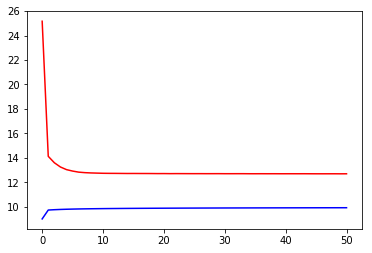

In [82]:
degree = 20
features = PolynomialFeatures(degree)
XPoly20 = features.fit_transform(XUniform2)

trainErrors = []
testErrors = []
lams = range(51)
for lam in lams:
    model = Ridge(alpha=lam)
    
    trainError, testError = PerformModelAndCrossValidation(model, XPoly20, y2)
    trainErrors.append(trainError)
    testErrors.append(testError)
    
    print "Lam:"+str(lam),
    print "testError:"+str(testError)

DrawErrors(lams, trainErrors, testErrors)

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije:

In [83]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

In [84]:
ERROR = (0.1)**6

def IsFloatEqual(floatOne, floatTwo):
    if ((floatTwo-ERROR) <= floatOne) and (floatOne <= (floatTwo+ERROR)):
        return True
    return False

def LNorm(wRow, p):
    wColumn = wRow.reshape(-1, 1)
    if p == 0:
        countZeros = 0
        for value in wColumn:
            if IsFloatEqual(value[0], 0.0):
                countZeros += 1
        return len(wColumn) - countZeros
    
    if p == 1:
        sum = 0
        for value in wColumn:
            sum += sqrt(value[0]**2)
        return sum
    
    if p == 2:
        try:
            return sqrt(np.dot(wRow, wColumn)[0][0])
        except:
            return sqrt(np.dot(wRow, wColumn)[0])
    
    print "ERROR_NOT_IMPLEMENTED"

#### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [85]:
def PerformLAndCalculateNorms(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    
    model.fit(X_train, y_train)
    wi = model.coef_
    
    L0 = LNorm(wi, 0)
    L1 = LNorm(wi, 1)
    L2 = LNorm(wi, 2)
    
    return L0, L1, L2

In [86]:
L0s = []
L1s = []
L2s = []
lams = range(1, 101)
for lam in lams:
    model = Ridge(alpha=lam)
    
    L0, L1, L2 = PerformLAndCalculateNorms(model, XPoly20, y2)
    L0s.append(L0)
    L1s.append(L1)
    L2s.append(L2)

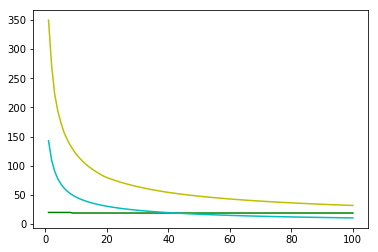

In [87]:
DrawResults(lams, L0s, "g")
DrawResults(lams, L1s, "y")
DrawResults(lams, L2s, "c")

#### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [88]:
from sklearn.linear_model import Lasso

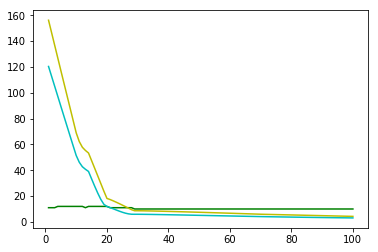

In [89]:
L0s = []
L1s = []
L2s = []
lams = range(1, 101)
for lam in lams:
    model = Lasso(alpha=lam)
    
    L0, L1, L2 = PerformLAndCalculateNorms(model, XPoly20, y2)
    L0s.append(L0)
    L1s.append(L1)
    L2s.append(L2)
    
DrawResults(lams, L0s, "g")
DrawResults(lams, L1s, "y")
DrawResults(lams, L2s, "c")

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [91]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)**

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

**b)**

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [52]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [53]:
from sklearn.preprocessing import StandardScaler

# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)**

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka 7b duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [54]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [55]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)**

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$, a jedan s $\lambda=1000$. Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [56]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)**

Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_fixed_X_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.

In [57]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  